<a href="https://colab.research.google.com/github/journey101/dsft01-section1-solo-project/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%90_%EA%B8%B0%EB%B0%98%ED%95%9C_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95_AB%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%82%AC%EB%A1%80_(%EC%95%84%EB%A7%88%EC%A1%B4_%EC%9E%A5%EB%82%9C%EA%B0%90_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%A1%B0%EC%B9%B4_%EC%84%A0%EB%AC%BC_%EA%B3%A0%EB%A5%B4%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< abstract >
> 
### Q. 조카 선물로 어떤 장난감을 선물해줘야 잘 주는 걸까?  (아마존에서 구입하는 상황)
- 가설1) 가장 판매량이 높은 10개의 브랜드 중에서 고르면 될까?
 
- 가설2) 그 다음엔 가격이 비싼 것을 사야 할 지? (비싸면 장땡일까?) 
 
- 가설3) 리뷰 평점이 높은 것을 사야 할지? 
 
- 가설4) 리뷰의 양이 많은 것을 사야 할지? 

- 해결책) 위 가설에서 찾은 필터로 선물 A안, B안 고르기! 

### 데이터 정리


In [ ]:
import pandas as pd
df = pd.read_csv('amazon_co-ecommerce_sample.csv')
df

#분석할 데이터 항목 : id, produect_name, manufaturer, price, number_of_reviews, average_review_rating
df1 = df[['uniq_id', 'product_name', 'manufacturer', 'price', 'number_of_reviews', 'average_review_rating']]

#결측치 제거  
df1.isna().sum()
df1 = df1.dropna()
print(df1.dtypes)
print('====\n')
print(df1.isna().sum())
print(df1.shape)
df1

uniq_id                  object
product_name             object
manufacturer             object
price                    object
number_of_reviews        object
average_review_rating    object
dtype: object
====

uniq_id                  0
product_name             0
manufacturer             0
price                    0
number_of_reviews        0
average_review_rating    0
dtype: int64
(8545, 6)


,uniq_id,product_name,manufacturer,price,number_of_reviews,average_review_rating
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,15,4.9 out of 5 stars
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,4.5 out of 5 stars
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,3.9 out of 5 stars
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,5.0 out of 5 stars
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,4.7 out of 5 stars
...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,3,5.0 out of 5 stars
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,1,4.0 out of 5 stars
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,1,5.0 out of 5 stars
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,1,5.0 out of 5 stars


### 가설1. 판매량 top 10 브랜드 찾기
가장 판매량이 높은 10개의 브랜드 중에서 고르면 될까?


top10 브랜드             manufacturer  sales_quantity
1430      Oxford Diecast             152
1114                LEGO             138
542               Disney             136
1529           Playmobil             117
1970  The Puppet Company             102
1817           Star Wars              93
1355         MyTinyWorld              93
1245              Mattel              77
885               Hasbro              75
437                Corgi              72

브랜드수 Oxford Diecast                        152
LEGO                                  138
Disney                                136
Playmobil                             117
The Puppet Company                    102
                                     ... 
SA                                      1
Water Lane Gifts                        1
Falcon Games                            1
Model Power (Postage Stamp Planes)      1
Thinkway Toys                           1
Name: manufacturer, Length: 2358, dtype: int64


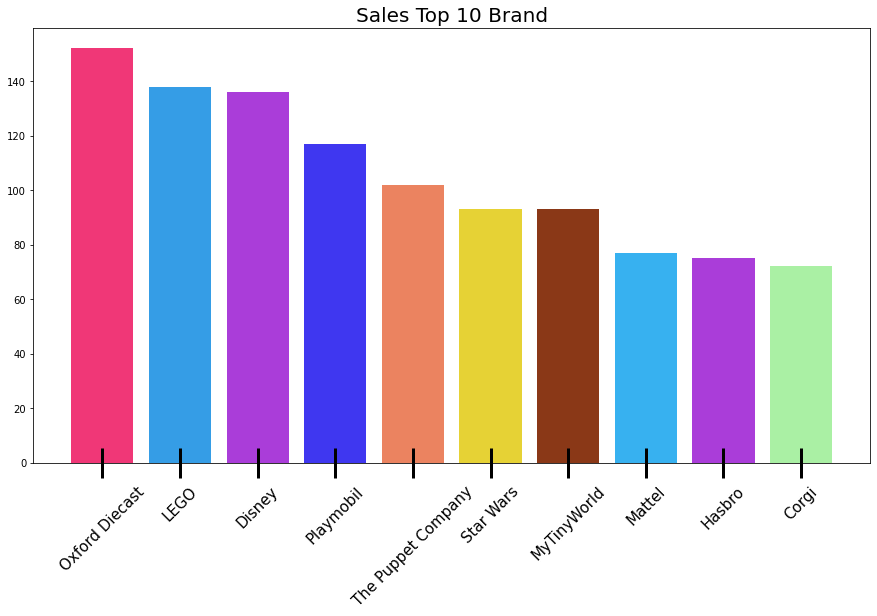

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
#판매량 
df2 = df1[['manufacturer','price']].groupby(['manufacturer'])['price'] \
                             .count() \
                             .reset_index(name='sales_quantity') \
                             .sort_values(['sales_quantity'], ascending=False) \
                             .head(10)


# plt.figure(figsize=(20, 8))
# sns.set_theme(style="whitegrid")
# sns.catplot(
#     data=df2, kind="bar",
#     x="manufacturer", y="sales_quantity")

print('top10 브랜드',df2)

#약 2358개 브랜드 
print('======\n')
print('브랜드수', df1['manufacturer'].value_counts())


plt.figure(figsize=(15, 8))
height = df2['sales_quantity']
x = df2['manufacturer']
p = plt.bar(x, height, color=['#F03777', '#359DE6', '#AA3DD9', '#3F37F0', '#EB8360',
                          '#E6D235', '#8A3817', '#37B1F0', '#AA3DD9', '#AAF0A4',
                          ])

plt.xticks(np.arange(0, 10, step=1), fontsize=16, rotation= 45)
plt.tick_params(axis='x', direction='inout', width=3 , length=30, pad=6, labelsize=15, labelcolor='black', bottom=True)
plt.title("Sales Top 10 Brand", fontdict={'fontsize':20})
plt.xticks(rotation = 45)
plt.savefig('plot_name.png', dpi = 300)
# plt.legend((p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9]),('Oxford', '2', '3', '4', '5', '6', '7', '8', '9', '10'))




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

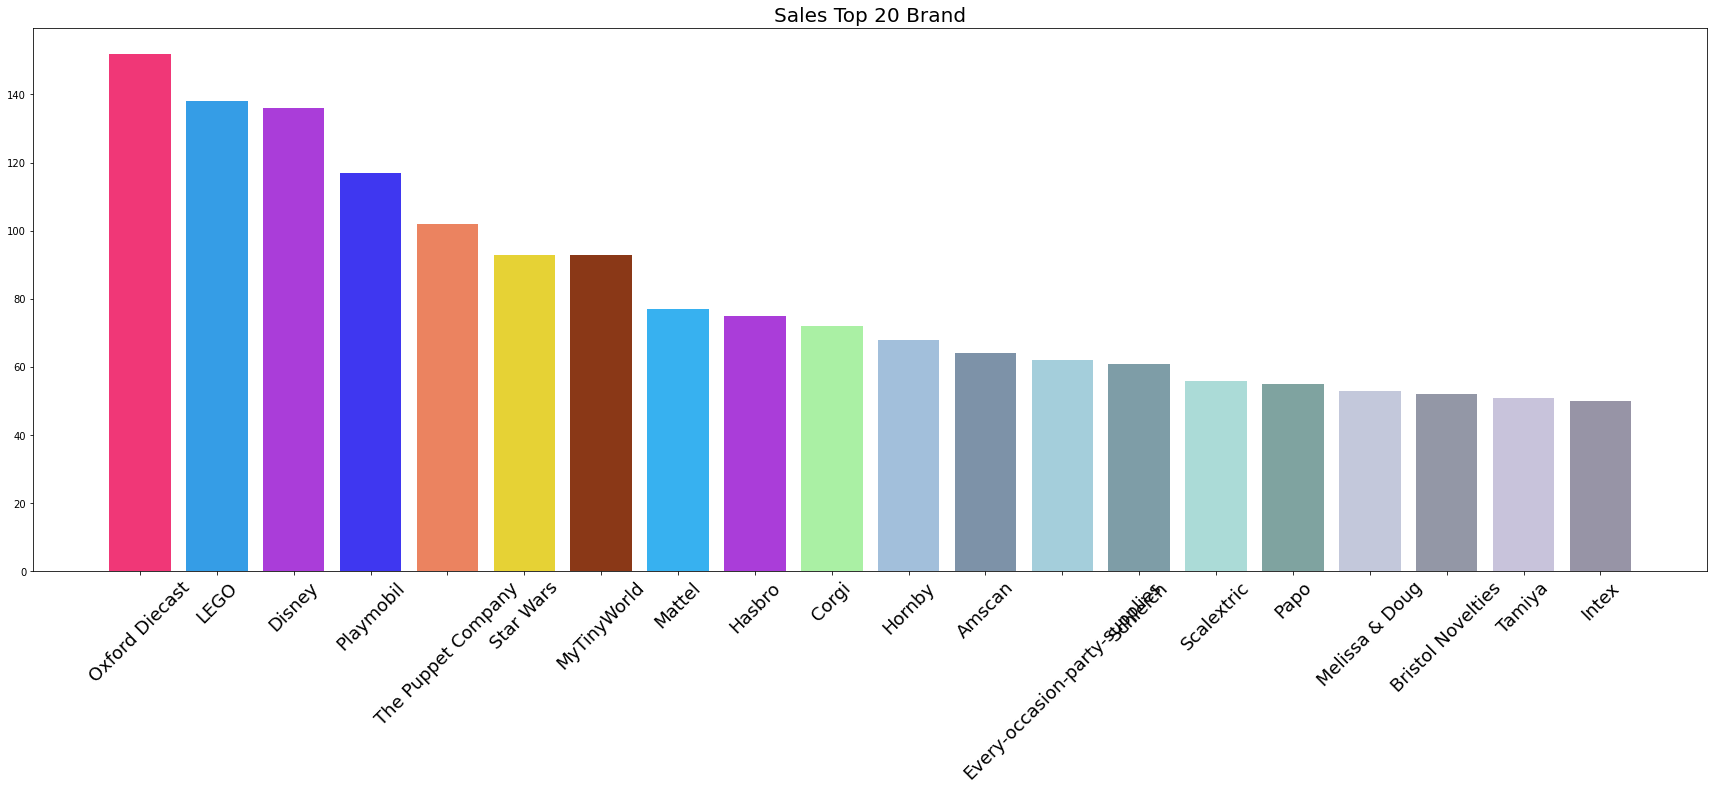

In [ ]:
# 어느 정도 비교를 위해 top 20도 내려봄.
df3 = df1[['manufacturer','price']].groupby(['manufacturer'])['price'] \
                             .count() \
                             .reset_index(name='sales_quantity') \
                             .sort_values(['sales_quantity'], ascending=False) \
                             .head(20)


plt.figure(figsize=(30, 10))
height_ = df3['sales_quantity']
x_ = df3['manufacturer']
plt.bar(x_, height_, color=['#F03777', '#359DE6', '#AA3DD9', '#3F37F0', '#EB8360',
                          '#E6D235', '#8A3817', '#37B1F0', '#AA3DD9', '#AAF0A4',
                          '#A2BFDB', '#7D92A8', '#A4CEDB', '#7E9DA7', '#ABDBD7',
                          '#7FA3A0', '#C3C8DB', '#9397A6', '#C8C3DB', '#9794A6'])

plt.xticks(fontsize=18)
plt.title("Sales Top 20 Brand", fontdict={'fontsize':20})
plt.xticks(rotation = 45 )



---



### 가설2. 가격이 비싼 것을 사야 할 지? (비싸면 장땡일까?) 


             manufacturer  sales_quantity      price  price_x
0          Oxford Diecast             152  10.585526     29.0
1                    LEGO             138  33.809420    374.0
2                  Disney             136  15.186029     68.0
3               Playmobil             117  28.856410    169.0
4      The Puppet Company             102  14.531373     43.0
...                   ...             ...        ...      ...
2353              Invero®               1   2.400000      2.4
2354            Interplay               1  10.000000     10.0
2355  Internet Gift Store               1   2.900000      2.9
2356              Inspire               1  13.000000     13.0
2357                 |MFG               1   4.900000      4.9

[2358 rows x 4 columns]
상관계수1(가격평균) :  -0.0011290111969809466
상관계수2(가격최대값) :  0.27624937905364505


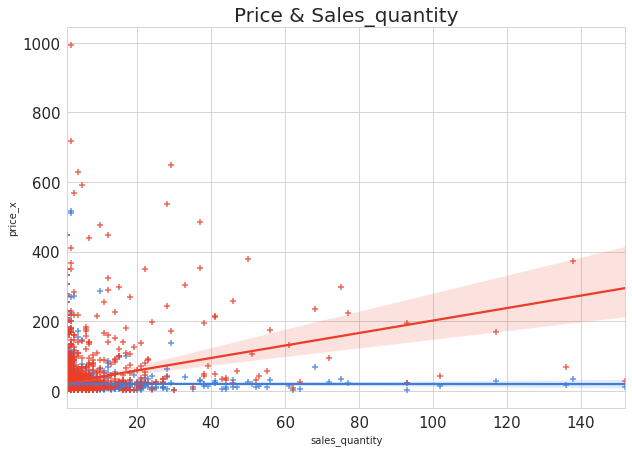

In [ ]:
df1['price_n'] = df1['price'].str[1:4]
df1['price_n'] = df1['price_n'].str.replace(',','')
df1['price_n'] = df1['price_n'].astype('float')

df7 = df1[['manufacturer','price']].groupby(['manufacturer'])['price'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

#가격의 평균값 
df8 = df1[['manufacturer','price_n']].groupby(['manufacturer'])['price_n'] \
                             .mean() \
                             .reset_index(name='mean') \
                             .sort_values(['mean'], ascending=False)

#가격의 최대값
df9 = df1[['manufacturer','price_n']].groupby(['manufacturer'])['price_n'] \
                             .max() \
                             .reset_index(name='max') \
                             .sort_values(['max'], ascending=False)


# df7,8,9 merge 데이터               
df_p = df7.merge(df8, how='left')
df_p = df_p.merge(df9, how='left')

df_p = df_p.rename(columns={'mean':'price', 'count':'sales_quantity', 'max':'price_x'})
print(df_p)
df_p['sales_quantity'] = df_p['sales_quantity'].astype('float')
df_p['price'] = df_p['price'].astype('float')
df_p.dtypes

# 상관계수 
print('상관계수1(가격평균) : ',df_p['sales_quantity'].corr(df_p['price']))
print('상관계수2(가격최대값) : ',df_p['sales_quantity'].corr(df_p['price_x']))

# 산점도, 회귀선 그래프 
sns.set_style(style='whitegrid')

plt.figure(figsize=(10, 7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.regplot(x="sales_quantity", y="price", data=df_p, marker='+', color='#3D7DDB')
sns.regplot(x="sales_quantity", y="price_x", data=df_p, marker='+', color='#EB3E29')

plt.title('Price & Sales_quantity',fontdict={'fontsize':20})
plt.savefig('plot_name.png', dpi = 500)

# sns.jointplot(x="purchase", y="number_of_reviews", kind='hex', data=df_s, xlim=20, ylim=20)


### 가설3. 리뷰 평점이 높은 것을 사면 괜찮을까? 

리뷰 평점과 판매량의 상관계수 0.01275522923823935


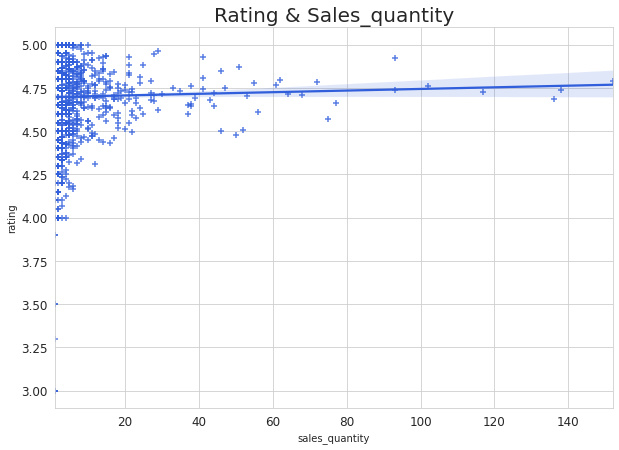

In [ ]:
# 평점 수치로 변경 
df1['average_review_rating'].dtypes
df1["rating"]=df1["average_review_rating"].str[0:3]
df1['rating'] = df1['rating'].astype('float')

df3 = df1[['manufacturer','price']].groupby(['manufacturer'])['price'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

df4 = df1[['manufacturer','rating']].groupby(['manufacturer'])['rating'] \
                             .mean() \
                             .reset_index(name='mean') \
                             .sort_values(['mean'], ascending=False)

# df3,4 merge 데이터               
df_r = df3.merge(df4, how='left')
df_r = df_r.rename(columns={'mean':'rating', 'count':'sales_quantity'})
df_r['sales_quantity'] = df_r['sales_quantity'].astype('float')
df_r['rating'] = df_r['rating'].astype('float')
df_r.dtypes

# 상관계수 
print('리뷰 평점과 판매량의 상관계수',df_r['sales_quantity'].corr(df_r['rating']))

# 산점도 그래프 
# sns.scatterplot(x="sales_quantity", y="rating",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), linewidth=0,
#                 data=df_r)

sns.set_style(style='whitegrid')

plt.figure(figsize=(10, 7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('plot_name.png', dpi = 500)
plt.title('Rating & Sales_quantity',fontdict={'fontsize':20})

sns.regplot(x="sales_quantity", y="rating", data=df_r, marker='+', color = '#315EDB')




In [ ]:
print(df_r.shape)

(2358, 3)


In [ ]:
# 평점 4.5점 판매량 vs 그 이하 판매량 비교 
a = df_r['sales_quantity'][(df_r['rating'] >= 4.5)].count()
b = df_r['sales_quantity'][(df_r['rating'] < 4.5)].count()

print('평점 4.5이상 판매량:', a)
print('평점 4.5미만 판매량:', b)
ratio = (a/b)

print('4.5이상 판매량 / 4.5미만 판매량 비율:',ratio)

평점 4.5이상 판매량: 1840
평점 4.5미만 판매량: 518
4.5이상 판매량 / 4.5미만 판매량 비율: 3.552123552123552


<BarContainer object of 2 artists>

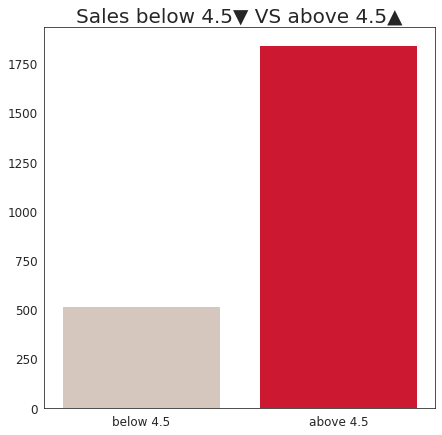

In [ ]:
from matplotlib import font_manager, rc

sns.set_style(style='white')
plt.figure(figsize=(7, 7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('plot_name.png', dpi = 500)
y = [518, 1840]
x = ['below 4.5', 'above 4.5']
plt.title('Sales below 4.5▼ VS above 4.5▲',fontdict={'fontsize':20})
plt.bar(x, y,  color=['#D5C7BD', '#CC1830'])
# plt.annotate('3.5', xy=(-1, 250), xytext=(5,5),
#             fontsize=14, ha='center',
#             arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))


In [ ]:
top10.sort_values(by='number_of_reviews', ascending=False).head(5)


,uniq_id,product_name,manufacturer,price,number_of_reviews,average_review_rating,rating,price_n
8932,d6f0074dae126a434d679be8eb022664,Playmobil 5135 Large Pirate Ship,Playmobil,£60.00,337.0,4.8 out of 5 stars,4.8,60.0
625,2c9ad456a2c29ffeb811e741f7c76394,LEGO Star Wars 75097: Advent Calendar,Star Wars,£29.98,291.0,4.6 out of 5 stars,4.6,29.0
754,1668098e56bc7b0b909607e5e3e89dc1,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,Star Wars,£63.97,253.0,4.7 out of 5 stars,4.7,63.0
730,5365a737432f34ae99dca4e8289b8078,Playmobil 5494 Christmas Advent Calendar Santa...,Playmobil,£15.39,199.0,4.6 out of 5 stars,4.6,15.0
604,a86f57bbf3abbddd964f1ca438a07c94,Playmobil 5494 Christmas Advent Calendar Santa...,Playmobil,£15.39,199.0,4.6 out of 5 stars,4.6,15.0


> 평점과 전체 판매량의 상관관계는 거의 없다고 볼 수 있음. (0.1)
> 
> 그러나 평점 5점 이상인 판매량과, 5점 미만의 판매량을 수치로 비교하면 약 2배(1.9배) 차이. 
> 
> 브랜드에서 평점 관리에 있어 최대한 5점을 받을 수 있도록 브랜드 및 상품 관리가 필요.
> 
> top 10 브랜드의 경우 평점 평균이 최소 4.6이상



---



### 가설4. 리뷰의 양이 많은 것을 사면 어떨까?

In [ ]:

df1['number_of_reviews'] = df1['number_of_reviews'].str.replace(',', "")
df1['number_of_reviews'] = df1['number_of_reviews'].astype('float')



             manufacturer  sales_quantity  number_of_reviews
0          Oxford Diecast             152              315.0
1                    LEGO             138             2490.0
2                  Disney             136             1229.0
3               Playmobil             117             2865.0
4      The Puppet Company             102             1151.0
...                   ...             ...                ...
2353              Invero®               1                6.0
2354            Interplay               1                2.0
2355  Internet Gift Store               1                3.0
2356              Inspire               1                1.0
2357                 |MFG               1                1.0

[2358 rows x 3 columns]
상관계수 0.6625109013481967


Text(0.5, 1.0, 'Number of reviews & Sales qauntity')

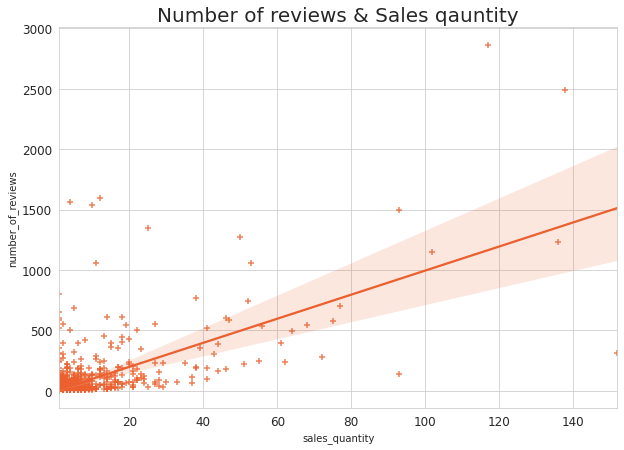

In [ ]:

df5 = df1[['manufacturer','price']].groupby(['manufacturer'])['price'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

df6 = df1[['manufacturer','number_of_reviews']].groupby(['manufacturer'])['number_of_reviews'] \
                             .sum() \
                             .reset_index(name='sum') \
                             .sort_values(['sum'], ascending=False)

# df5,6 merge 데이터               
df_s = df5.merge(df6, how='left')
df_s = df_s.rename(columns={'sum':'number_of_reviews', 'count':'sales_quantity'})
print(df_s)
df_s['sales_quantity'] = df_s['sales_quantity'].astype('int')
df_s['number_of_reviews'] = df_s['number_of_reviews'].astype('int')
# df_s.dtypes

# 상관계수 
print('상관계수',df_s['sales_quantity'].corr(df_s['number_of_reviews']))

# 산점도, 회귀선 그래프 
sns.set_style(style='whitegrid')

plt.figure(figsize=(10, 7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('plot_name.png', dpi = 500)

sns.regplot(x="sales_quantity", y="number_of_reviews", data=df_s, marker='+', color='#EB602E')

plt.title('Number of reviews & Sales qauntity',fontdict={'fontsize':20})



### 해결책 도출 
> '리뷰의 양이 많은 것이 판매량과 연관관계가 있고, 평점 4.5이상인 제품들이 그 미만인 제품들에 비해 3.5배 이상 팔리는 것으로 보아, 
> 
> 판매량 Top10 브랜드 상품 중에서도 리뷰의 양이 가장 많으면서, 평점은 4.5 이상인 것들 중 A, B안으로 골라보자'

In [ ]:
filter10 = df1['manufacturer'].isin(['Oxford Diecast', 'LEGO', 'Disney', 'Playmobil', 'The Puppet Company', 'Star Wars', 'MyTinyWorld', 'Mattel', 'Hasbro', 'Corgi'])
sol_10 = df1[filter10]
sol_10 = sol_10[['manufacturer', 'number_of_reviews', 
                 'rating', 'product_name']]

# top 10의 리뷰의 양 집계
sol_reviews = sol_10[['manufacturer','number_of_reviews']].groupby(['manufacturer'])['number_of_reviews'] \
                             .sum() \
                             .reset_index(name='reviews') \
                             .sort_values(['reviews'], ascending=False)
sol_reviews

# top 10의 평점 평균 집계 
sol_rating = sol_10[['manufacturer','rating']].groupby(['manufacturer'])['rating'] \
                             .mean() \
                             .reset_index(name='rating') \
                             .sort_values(['rating'], ascending=False)
sol_rating

# top 10 의 리뷰의 양, 평점 평균 데이터 결합

sol_merge = sol_reviews.merge(sol_rating, how='left').sort_values(by='reviews', ascending=False)
sol_merge


,manufacturer,reviews,rating
0,Playmobil,2865.0,4.726496
1,LEGO,2490.0,4.736232
2,Star Wars,1495.0,4.738710
3,Disney,1229.0,4.687500
4,The Puppet Company,1151.0,4.759804
5,Mattel,703.0,4.661039
6,Hasbro,577.0,4.572000
7,Oxford Diecast,315.0,4.790789
8,Corgi,281.0,4.783333
9,MyTinyWorld,139.0,4.923656


> --> Playmobil, LEGO 선정

In [ ]:
# playmobil, lego 상품 상세명 데이터 
filter_ab = df1['manufacturer'].isin(['LEGO','Playmobil'])
sol_ab = sol_10[filter_ab]
sol_ab = sol_ab.sort_values(by='number_of_reviews', ascending=False)
sol_ab_ = sol_ab[sol_ab.rating >= 4.5]
sol_ab_.sort_values(by='number_of_reviews', ascending=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,manufacturer,number_of_reviews,rating,product_name
8932,Playmobil,337.0,4.8,Playmobil 5135 Large Pirate Ship
730,Playmobil,199.0,4.6,Playmobil 5494 Christmas Advent Calendar Santa...
604,Playmobil,199.0,4.6,Playmobil 5494 Christmas Advent Calendar Santa...
2531,LEGO,133.0,4.7,LEGO Star Wars 75038: Jedi Interceptor
747,Playmobil,130.0,4.8,Playmobil 5492 Christmas Advent Calendar Unico...
...,...,...,...,...
8938,Playmobil,1.0,5.0,Pirates 5901: Small Ghost Pirate Ship - Playmobil
2501,LEGO,1.0,5.0,LEGO Bricks: Grey 2x4. Part 3001 (X 25)
637,Playmobil,1.0,5.0,PLAYMOBIL 5217 SINTERKLAAS ADVENT KALENDER CAL...
8301,Playmobil,1.0,5.0,PLAYMOBIL 7451 - 3 ouvriers de chantiers avec ...


> --> Playmobile 의 Playmobil 5135 Large Pirate Ship
> 
> --> LEGO의 LEGO Star Wars 75038: Jedi Interceptor
> 
> 선정!